<a href="https://colab.research.google.com/github/nic98choong/test_repo/blob/main/ML_Final_Assignment_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Final Assignment - World Happiness Classification Competition

Goals :
Understand how the models function
Understand what the parameters control
Share your models to a centralized leaderboard
Learn from the model experimentation process
Make a good looking notebook report
Upload as a personal project on Github

Overall Steps:
Get data in and set up X_train / X_test / y_train
Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
Fit model on preprocessed data and save preprocessor function and model
Generate predictions from X_test data and submit model to competition
Repeat submission process to improve place on leaderboard

Author: Nicholas Choong

In [16]:
#install aimodelshare library
! pip install aimodelshare --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 

## 1. About the dataset

In [1]:
# Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

# Load data
import pandas as pd

# Load training data
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')

# Load test features
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')

# Load y train (true labels)
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')

X_train.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru           0.960           1.274                    0.854   
1         Nicaragua           0.694           1.325                    0.835   
2            Greece           1.181           1.156                    0.999   
3             Qatar           1.684           1.313                    0.871   
4        Uzbekistan           0.745           1.529                    0.756   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.455       0.083                      0.027   
1                         0.435       0.200                      0.127   
2                         0.067       0.000                      0.034   
3                         0.555       0.220                      0.167   
4                         0.631       0.322                      0.240   

         name    region                       sub-region  Terrorist_attacks  
0        Peru  Americas  Latin America and the Caribbean          18.000000  
1   Nicaragua  Americas  Latin America and the Caribbean         125.611111  
2      Greece    Europe                  Southern Europe         112.000000  
3       Qatar      Asia                     Western Asia          57.333333  
4  Uzbekistan      Asia                     Central Asia         125.611111

# 2. Exploratory Data Analysis

In [2]:
print(X_train.dtypes)

Country or region                object
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
name                             object
region                           object
sub-region                       object
Terrorist_attacks               float64
dtype: object


In [4]:
# Identify the target variable (i.e. Happiness Score)
y_train_labels = y_train.idxmax(axis=1)
y_train_labels

print(y_train_labels)
print(y_train)

0       Average
1          High
2       Average
3     Very High
4          High
        ...    
83      Average
84          Low
85    Very High
86      Average
87          Low
Length: 88, dtype: object
    Average  High  Low  Very High  Very Low
0         1     0    0          0         0
1         0     1    0          0         0
2         1     0    0          0         0
3         0     0    0          1         0
4         0     1    0          0         0
..      ...   ...  ...        ...       ...
83        1     0    0          0         0
84        0     0    1          0         0
85        0     0    0          1         0
86        1     0    0          0         0
87        0     0    1          0         0

[88 rows x 5 columns]


In [5]:
# Calculate the number of missing values per column
missing_values_count = X_train.isna().sum()

# Calculate the percentage of missing values per column
total_rows = len(X_train)
missing_values_percentage = (missing_values_count / total_rows) * 100

# Create a DataFrame to display the results
missing_values_info = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

# Display the missing values information
print("Number and percentage of missing values in each column:")
print(missing_values_info)

Number and percentage of missing values in each column:
                              Missing Values Count  Missing Values Percentage
Country or region                                0                        0.0
GDP per capita                                   0                        0.0
Social support                                   0                        0.0
Healthy life expectancy                          0                        0.0
Freedom to make life choices                     0                        0.0
Generosity                                       0                        0.0
Perceptions of corruption                        0                        0.0
name                                             0                        0.0
region                                           0                        0.0
sub-region                                       0                        0.0
Terrorist_attacks                                0                        0.0


First Impression: The dataset appears to contain information about country-level data on factors that could influence the level of happiness in a country, including economic indicators (e.g. GDP per capita), sociodemographic factors (e.g. social support, healthy life expectancy, perceptions of corruption), and geographic data (e.g. region, sub-region).

# 2.1. Histogram of key features in dataset

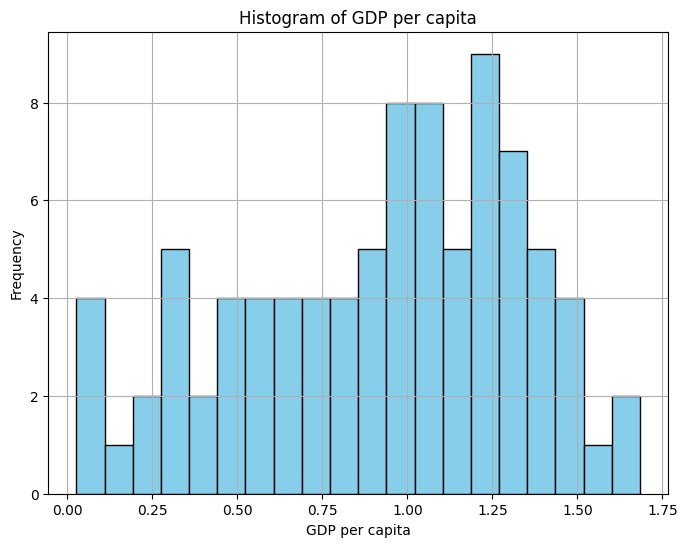

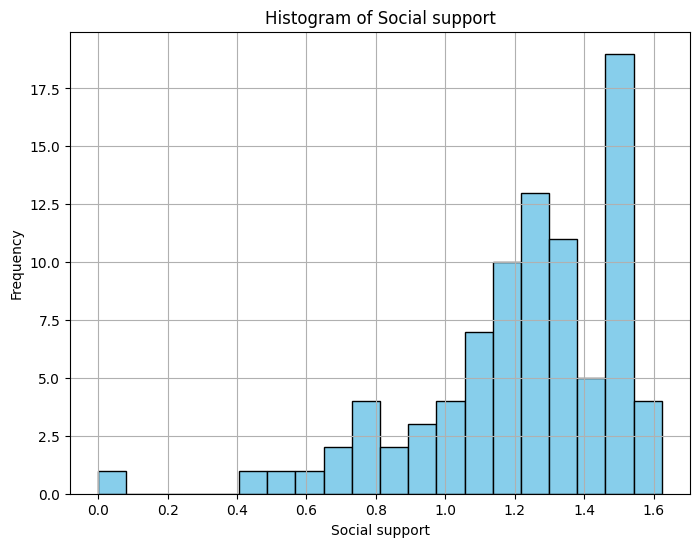

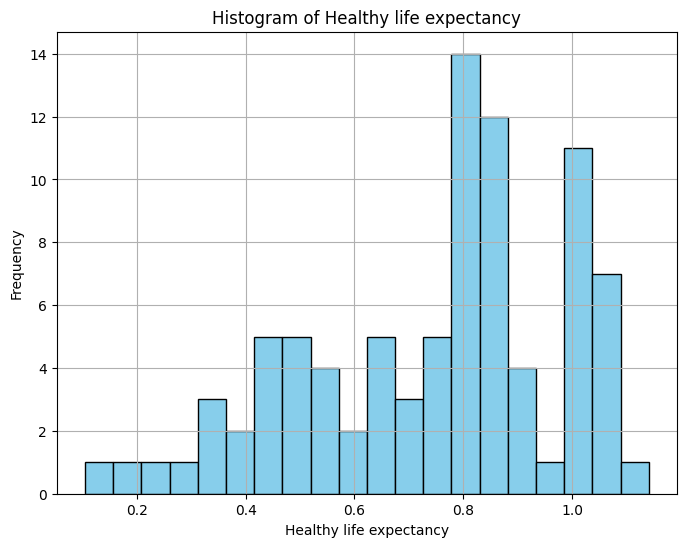

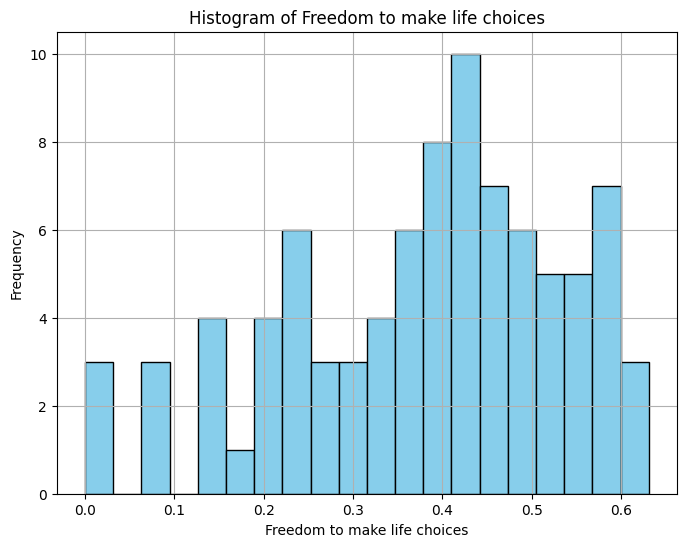

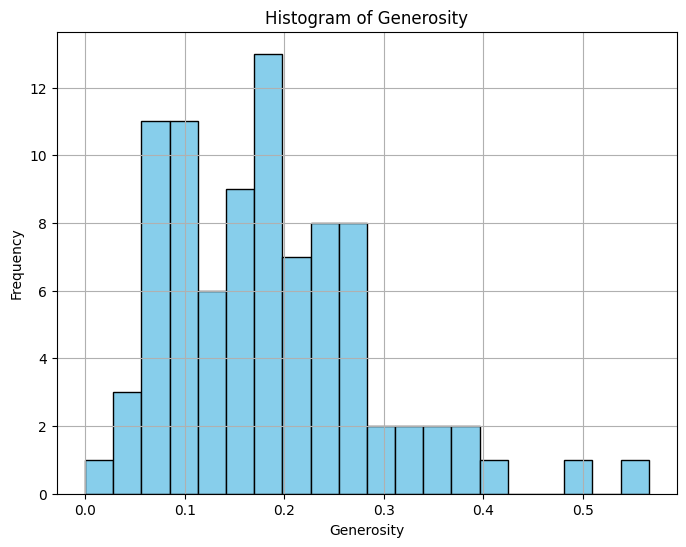

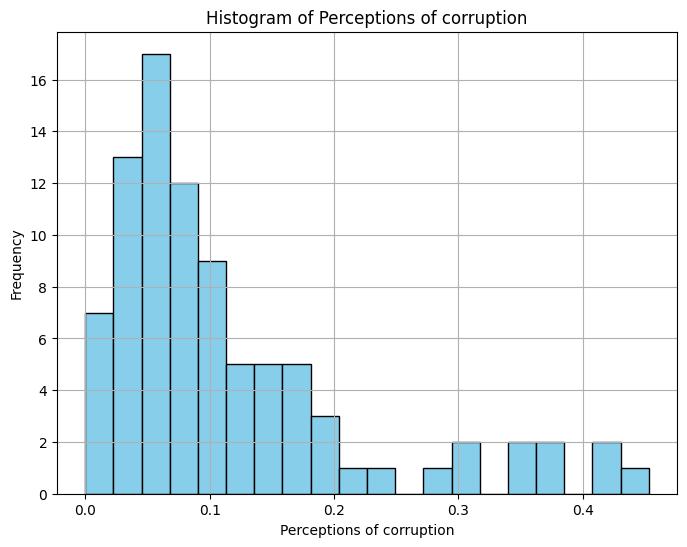

In [6]:
import matplotlib.pyplot as plt

# Select important features
important_features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Plot histograms for each selected feature
for feature in important_features:
    plt.figure(figsize=(8, 6))
    plt.hist(X_train[feature].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

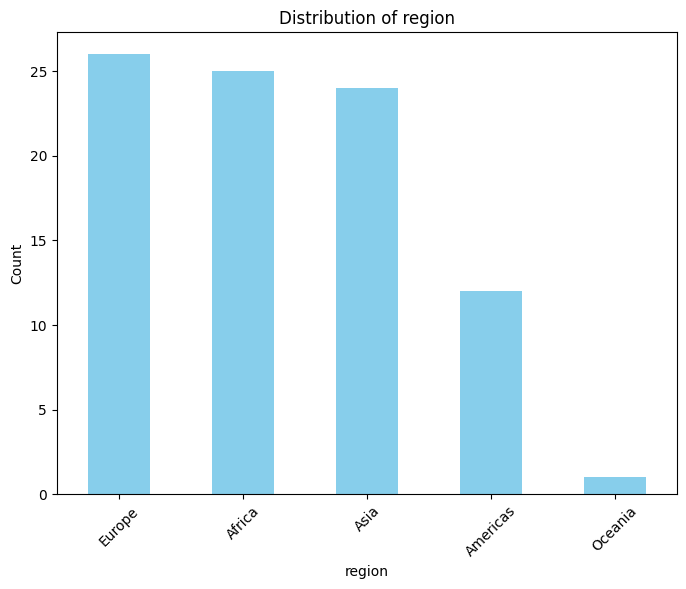

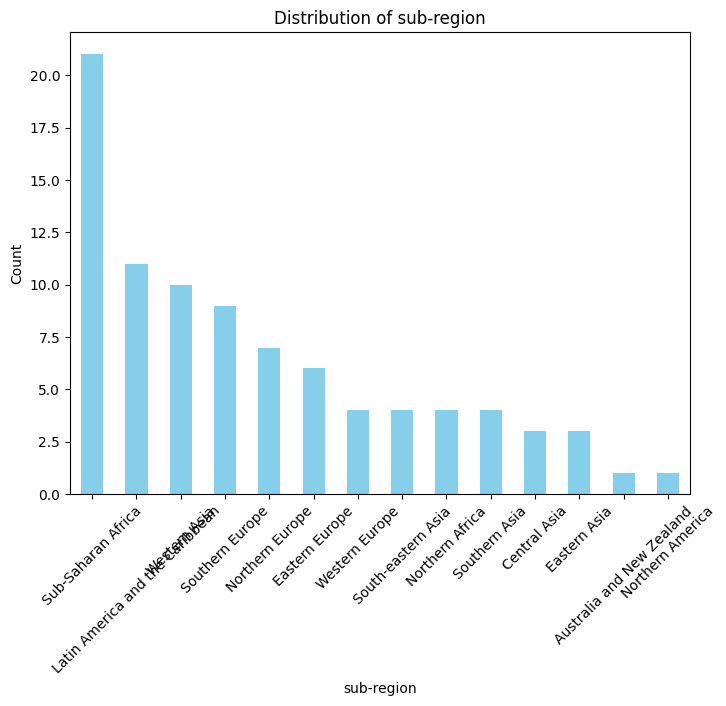

In [7]:
# Select categorical features
categorical_features = ['region', 'sub-region']

# Plot bar plots for each selected feature
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    X_train[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

#2.2. What is the relationship amongst feature variables and between predictor variables and target variable (Happiness Level)?  

2.2.1 Regression & Distribution plots of relationships between predictor variables



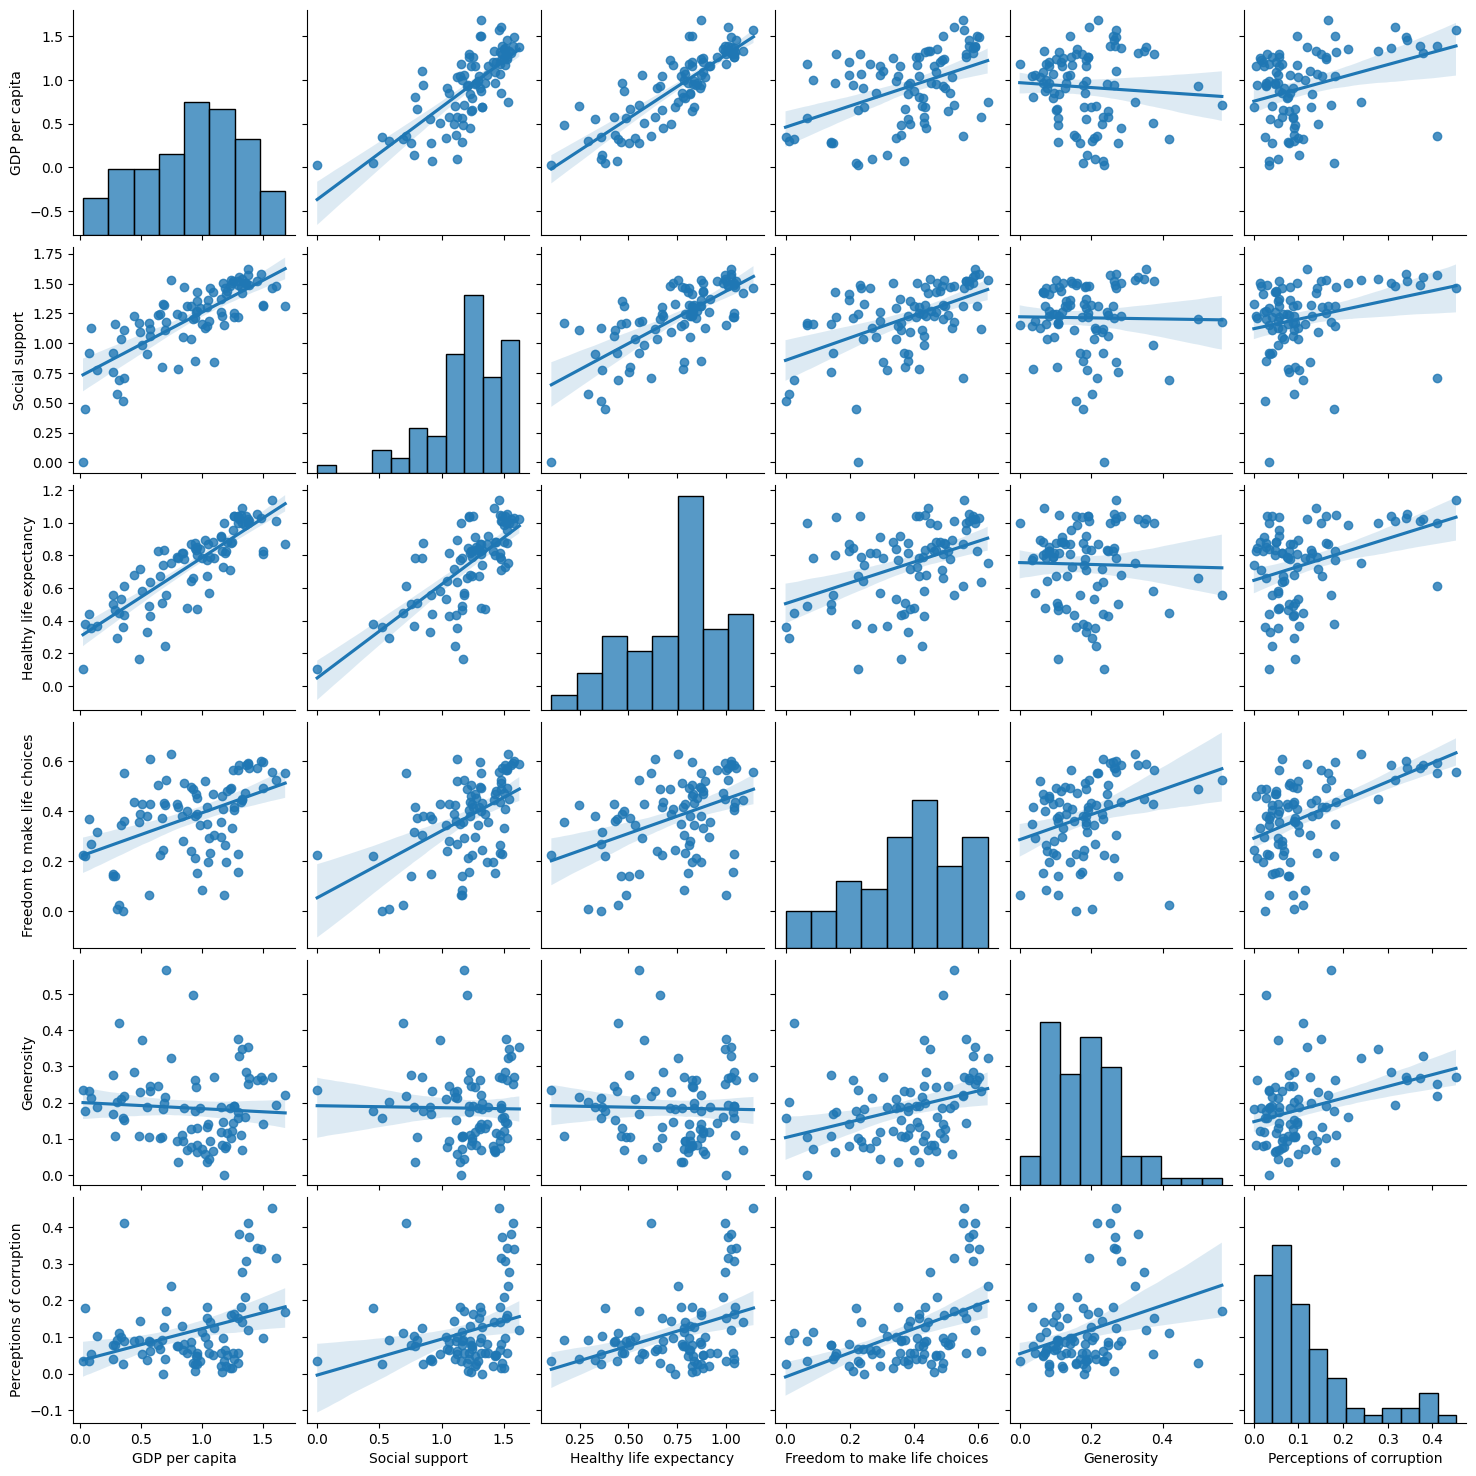

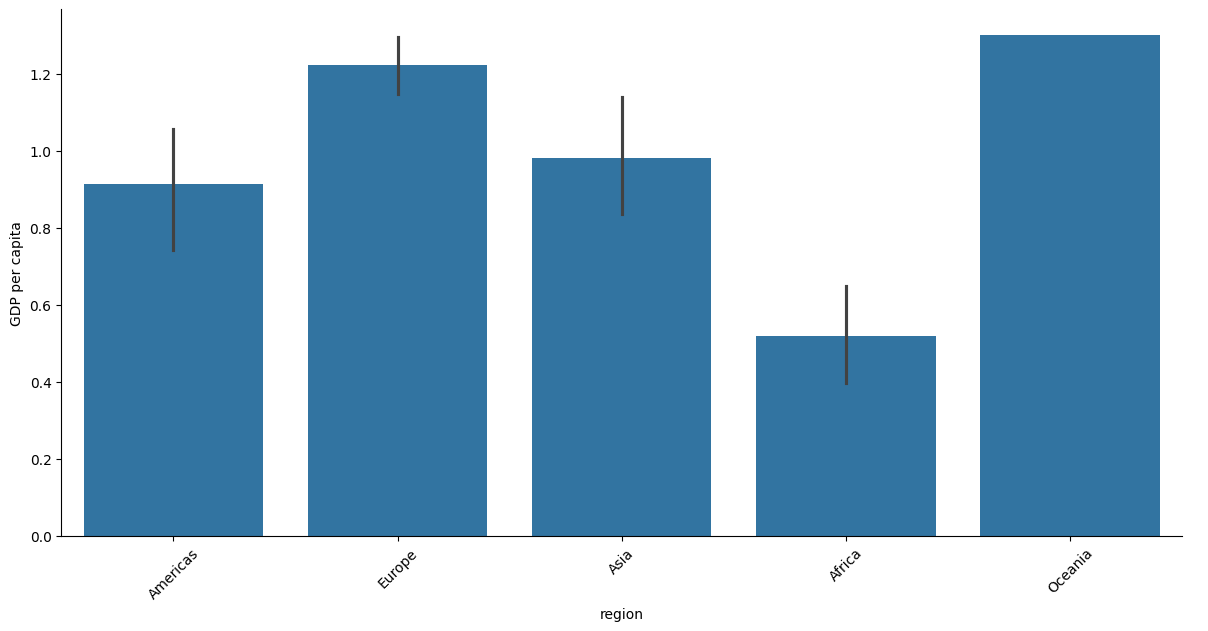

In [8]:
import seaborn as sns

# Bivariate analysis for numerical variables
sns.pairplot(X_train[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']],kind='reg')
plt.show()

# Bivariate analysis for categorical variables
sns.catplot(x='region', y='GDP per capita', data=X_train, kind='bar', height=6, aspect=2)
plt.xticks(rotation=45)
plt.show()


# 2.2.2 Correlation Matrix of Predictor Variables

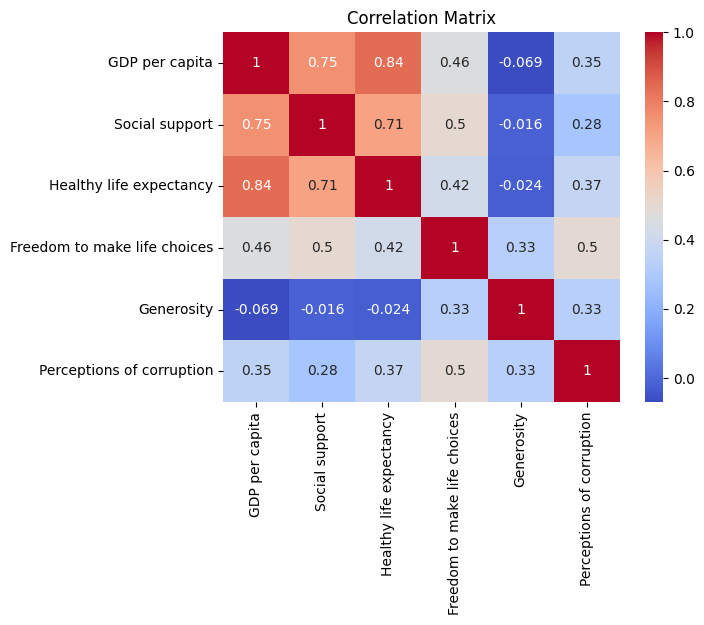

In [9]:
# Correlation matrix
corr_matrix = X_train[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']].corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 2.2.3 Correlation between feature variables and target variable

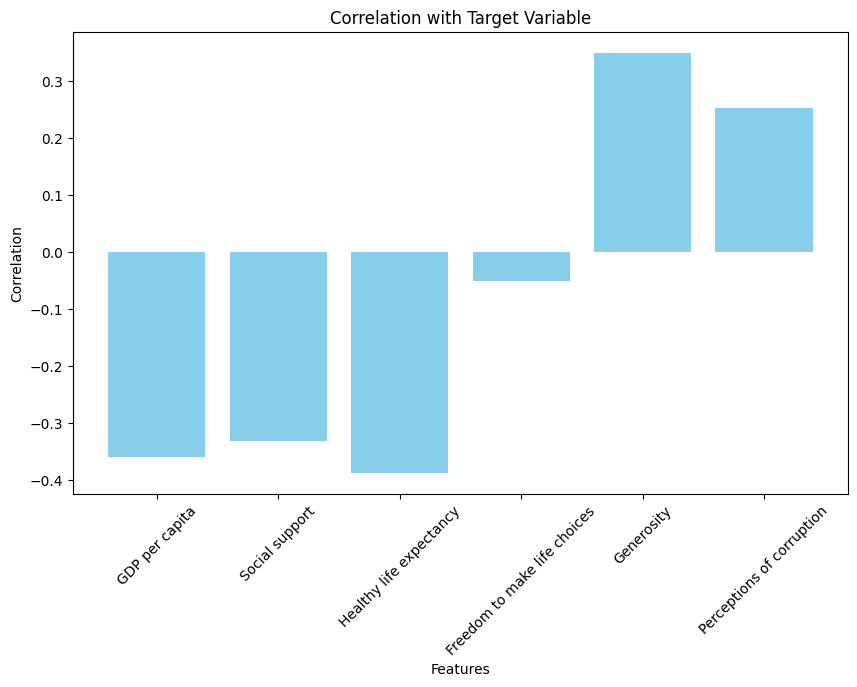

In [11]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_numeric = label_encoder.fit_transform(y_train_labels)

# Calculate correlation with the target variable
feature_names = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
target_corr = np.corrcoef(X_train[feature_names].T, y_train_numeric)

# Extract correlation coefficients for features
feature_corr_with_target = target_corr[:-1, -1]

# Visualize correlation with the target variable
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_corr_with_target, color='skyblue')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

According to the charts, a country's level of happiness appears to have a positive correlation with the variables "Generosity" and "Perceptions of corruption". The correlation coefficients of 0.33 and 0.25, respectively, suggest a moderate positive relationship. While these coefficients indicate a positive association, it's worth noting that they are relatively modest in magnitude.
Conversely, a country's level of happiness shows a negative correlation with the variables "GDP per capita", "Social support", "Healthy life expectancy", and "Freedom to make life choices". The correlation coefficients for the first three variables are approximately -0.35 each. These coefficients also indicate a moderate negative relationship, suggesting that as these variables decrease, happiness tends to decrease as well.

# 3. Preprocessing Data

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

3.1 Explanation of data preprocessing

The first step is identifying the numeric features in the dataset X_train by selecting columns with data types 'int64' or 'float64'. We convert the resulting Index object to a list of column names. Concurrently, we identify the categorical features by selecting region and sub-region.

Next, we define a pipeline for numerical features, numeric_transformer, which consists of two steps:
Imputation: Missing values are imputed using a constant value of 0.

Scaling: The data is standardized using StandardScaler(). Standardization is performed to ensure that all numerical features have a mean of 0 and a standard deviation of 1, which can improve the performance of certain machine learning algorithms.

Concurrently, we define a pipeline for categorical features, categorical_transformer, which consists of two steps:
- Imputation: Missing values are imputed using the most frequent value in each column. This strategy is chosen because it's simple and effective for categorical data.
- One-Hot Encoding: Categorical variables are one-hot encoded using OneHotEncoder(). This transformation is necessary because many machine learning algorithms cannot directly handle categorical data, and one-hot encoding converts categorical variables into a binary format that can be used by these algorithms.

We then create a ColumnTransformer object, preprocessor, that applies the specified transformations to the numeric and categorical features separately. This ensures that each feature type is processed appropriately.

Finally, we fit the preprocessor to the training data, X_train, using preprocess.fit(X_train). This step learns the parameters (e.g., mean and standard deviation for scaling, most frequent values for imputation) from the training data.

In [23]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

preprocessor(X_train)

array([[ 0.10444464,  0.20603101,  0.45831144, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54388211,  0.38059533,  0.37791099, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64309205, -0.19786289,  1.07189386, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.01356448,  1.10965806,  1.05919905, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27261963, -0.30397062,  0.62334396, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5950658 , -1.4198131 , -1.00582315, ...,  1.        ,
         0.        ,  0.        ]])

In [24]:
preprocessor(X_train).shape

(88, 26)

#3.2. Fit model on preprocessed data and save preprocessor function and model

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train_preprocessed = preprocess.transform(X_train)

# Define Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the preprocessed training data
model.fit(X_train_preprocessed, y_train_labels)

# Predict labels for the preprocessed training data
train_predictions = model.predict(X_train_preprocessed)

# Calculate accuracy score on the preprocessed training data
train_accuracy = accuracy_score(y_train_labels, train_predictions)

print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


3.2.1 Save preprocessor function and model

In [26]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


In [27]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]
onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [29]:
# 3.3. Submitting initial model to the competition

In [28]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground
## Do not change this
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [30]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [31]:
#Submit Model 1:

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

model_filepath1 = "model.onnx"
preprocessor_filepath="preprocessor.zip"

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath1,
                           preprocessor=preprocessor_filepath,
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1047

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [32]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

# 3.3 Hyperparamter tuning: Finding the best hyperparameters for models

To improve model performance, we make use of GridSearchCV to identify the most optimal parameters for different classification models.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the models
models = {
    "SVC": SVC(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

# Define parameter grids for each model
param_grids = {
    'SVC': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'BaggingClassifier': {'n_estimators': [50, 100, 150], 'max_samples': [0.5, 0.7, 1.0]},
    'RandomForestClassifier': {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, None]}
}

# Dictionary to store the best parameters and scores for each model
best_params = {}
best_scores = {}

# Loop over each model
for model_name, param_grid in param_grids.items():
    # Create a GridSearchCV object with the model and parameter grid
    grid_model = GridSearchCV(models[model_name], param_grid, cv=5)

    # Fit the GridSearchCV object to the preprocessed training data
    grid_model.fit(preprocessor(X_train), y_train_labels)

    # Store the best parameters and score for the model
    best_params[model_name] = grid_model.best_params_
    best_scores[model_name] = grid_model.best_score_

    # Print the best parameters and score
    print(f"Best parameters for {model_name}: {grid_model.best_params_}")
    print(f"Best mean cross-validation score for {model_name}: {grid_model.best_score_}\n")

Best parameters for SVC: {'C': 1, 'gamma': 0.1}
Best mean cross-validation score for SVC: 0.7052287581699346

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'n_estimators': 150}
Best mean cross-validation score for GradientBoostingClassifier: 0.5803921568627451

Best parameters for KNeighborsClassifier: {'n_neighbors': 7, 'weights': 'uniform'}
Best mean cross-validation score for KNeighborsClassifier: 0.6607843137254903

Best parameters for BaggingClassifier: {'max_samples': 0.7, 'n_estimators': 150}
Best mean cross-validation score for BaggingClassifier: 0.6928104575163399

Best parameters for RandomForestClassifier: {'max_depth': 5, 'n_estimators': 300}
Best mean cross-validation score for RandomForestClassifier: 0.7163398692810458



# 3.4. Model: Using the most optimal hyperparameters to submit prediction models for competition

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from aimodelshare.aimsonnx import model_to_onnx
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define models with best hyperparameters
models = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=7, weights='uniform'),
    "SVC": SVC(kernel='rbf', C=1.0, gamma=0.1),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, max_depth=5, random_state=42),
    "BaggingClassifier": BaggingClassifier(max_samples=0.7, n_estimators=150),
    "GradientBoostingClassifier": GradientBoostingClassifier(learning_rate=0.1, n_estimators=150)
}

# Create a pipline
for model_name, model in models.items():
    # Define a pipeline including preprocessing steps and the model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fit the pipeline to the preprocessed training data
    pipeline.fit(preprocessor(X_train), y_train_labels)

    # Save sklearn model to local ONNX file
    feature_count = preprocessor(X_test).shape[1]  # Get count of preprocessed features
    initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features
    onnx_model = model_to_onnx(pipeline, framework='sklearn', initial_types=initial_type, transfer_learning=False, deep_learning=False)

    # Write the ONNX model to a file
    model_filepath = f"{model_name}_model.onnx"
    with open(model_filepath, "wb") as f:
        f.write(onnx_model.SerializeToString())

    # Generate predicted values
    prediction_labels = pipeline.predict(preprocessor(X_test))

    # Submit model to Competition Leaderboard
    mycompetition.submit_model(model=model_filepath, prediction_submission=prediction_labels, preprocessor=preprocessor_filepath)


Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1048

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1049

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1050

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164
Insert search tags to help users find yo

#3.4.1 Deep Learning Models

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import OneHotEncoder

# One-hot encode y_train
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()

# Define a Neural Network Model with 5 layers: 128 -> 64 -> 64 -> 32 -> (?)
keras_model = Sequential([
    Dense(128, input_shape=(feature_count,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Number of neurons equal to number of classes
])

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train_encoded,
                batch_size=20,
                epochs=300,
                validation_split=0.25)

Epoch 1/300
4/4 [==============================] - 2s 172ms/step - loss: 0.7069 - accuracy: 0.3939 - val_loss: 0.6852 - val_accuracy: 0.5909
Epoch 2/300
4/4 [==============================] - 0s 23ms/step - loss: 0.6766 - accuracy: 0.6061 - val_loss: 0.6606 - val_accuracy: 0.7273
Epoch 3/300
4/4 [==============================] - 0s 47ms/step - loss: 0.6493 - accuracy: 0.6818 - val_loss: 0.6428 - val_accuracy: 0.7273
Epoch 4/300
4/4 [==============================] - 0s 24ms/step - loss: 0.6282 - accuracy: 0.7727 - val_loss: 0.6260 - val_accuracy: 0.7273
Epoch 5/300
4/4 [==============================] - 0s 30ms/step - loss: 0.6089 - accuracy: 0.8030 - val_loss: 0.6152 - val_accuracy: 0.7727
Epoch 6/300
4/4 [==============================] - 0s 23ms/step - loss: 0.5954 - accuracy: 0.8030 - val_loss: 0.6050 - val_accuracy: 0.7727
Epoch 7/300
4/4 [==============================] - 0s 30ms/step - loss: 0.5827 - accuracy: 0.8030 - val_loss: 0.5942 - val_accuracy: 0.7727
Epoch 8/300
4/4 [==

Epoch 1/300
4/4 [==============================] - 0s 44ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 1.3230 - val_accuracy: 0.6818
Epoch 2/300
4/4 [==============================] - 0s 18ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 1.3370 - val_accuracy: 0.7273
Epoch 3/300
4/4 [==============================] - 0s 27ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 1.3368 - val_accuracy: 0.6818
Epoch 4/300
4/4 [==============================] - 0s 25ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 1.3230 - val_accuracy: 0.6818
Epoch 5/300
4/4 [==============================] - 0s 20ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 1.2938 - val_accuracy: 0.6818
Epoch 6/300
4/4 [==============================] - 0s 20ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 1.3125 - val_accuracy: 0.6818
Epoch 7/300
4/4 [==============================] - 0s 23ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 1.3229 - val_accuracy: 0.6818
Epoch 8/300
4/4 [===

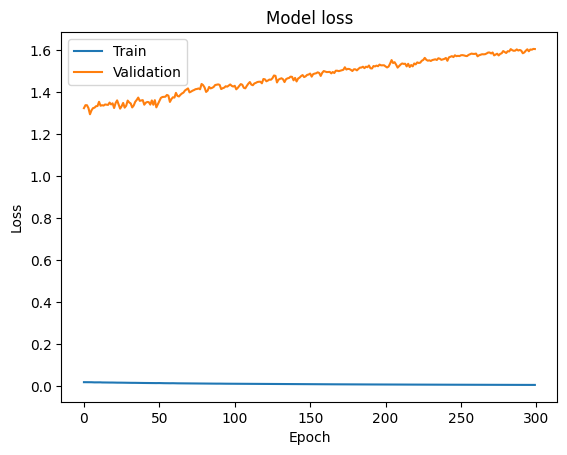

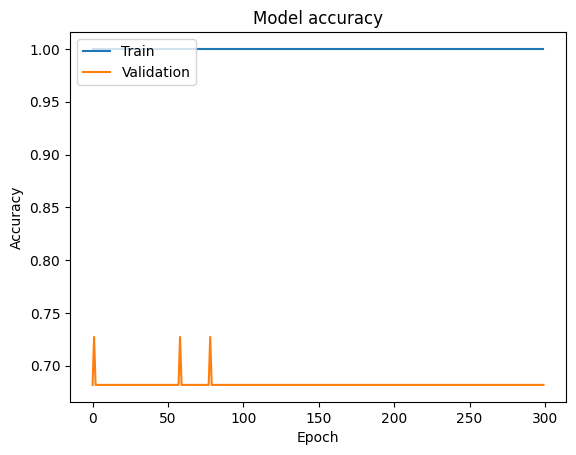

In [44]:
import matplotlib.pyplot as plt

# Fitting the NN to the Training set and storing the training history
history = keras_model.fit(preprocessor(X_train), y_train_encoded,
                          batch_size=20,
                          epochs=300,
                          validation_split=0.25,
                          verbose=1)  # Set verbose to 1 to display training progress

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In the middle layers of the neural network model, I used the Rectified Linear Unit (ReLU) activation function. ReLU is a commonly used activation function in hidden layers of neural networks because it introduces non-linearity to the model while being computationally efficient and avoiding the vanishing gradient problem.
In the last layer of the neural network model, I used the softmax activation function. Softmax is typically used in the output layer of a multi-class classification problem. It transforms the raw output scores from the previous layer into probabilities, ensuring that the sum of the probabilities across all classes is equal to 1. This makes it suitable for multi-class classification tasks as it provides a probability distribution over the possible classes, allowing us to interpret the model's output as the likelihood of each class.

The training loss and accuracy are consistently improving over the epochs, indicating that the model is learning from the training data. The validation loss and accuracy are relatively stable, with slight fluctuations but no significant improvement or deterioration. This suggests that the model's performance on the validation set has plateaued. The final validation accuracy is around 77.27%, indicating that the model is performing reasonably well on unseen data. Given these observations, it seems that the model has converged, and training for 300 or more epochs may not lead to significant improvements and hence should not be conducted.

In [42]:
# Save keras model to ONNX file

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [43]:
# Submit keras model:

#-- Generate predicted y values
prediction_labels_index = keras_model.predict(preprocessor(X_test))

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index = np.argmax(prediction_labels_index, axis=1)

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

model_filepath5 = "model.onnx"

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath5,
                                 prediction_submission=prediction_labels,
                                 preprocessor=preprocessor_filepath)

3/3 [==============================] - 0s 4ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1053

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


#3.4.2 Comparing between models & observing model performance in the competion

In [45]:
# Compare my models
data=mycompetition.compare_models([1,2,3,4], verbose=1)
mycompetition.stylize_compare(data)

In [46]:
# See model performance on leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

We see that our top performing model makes use of the BaggingClassifierand has an accuracy score of ~56%, f1 score of 54.5% and precision score of 67.21%.